### Introduction:
Mercedes known for their automotive innovations has a wide range of cars with customizable options for their customers. Before hitting the market the car needs to undergo a series of tests like safety, reliability and robustness of the components.

##### Business problem:
The business problem here is to predict the amount of time that each car with a specific set of configurations will spend on the test bench. This is a regression problem that we need to solve since the target variable is a continuous variable.

IMPORT REQURIED LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv('train.csv')

In [4]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info

<bound method DataFrame.info of         ID       y  X0 X1  X2 X3 X4  X5 X6 X8  ...  X375  X376  X377  X378  \
0        0  130.81   k  v  at  a  d   u  j  o  ...     0     0     1     0   
1        6   88.53   k  t  av  e  d   y  l  o  ...     1     0     0     0   
2        7   76.26  az  w   n  c  d   x  j  x  ...     0     0     0     0   
3        9   80.62  az  t   n  f  d   x  l  e  ...     0     0     0     0   
4       13   78.02  az  v   n  f  d   h  d  n  ...     0     0     0     0   
...    ...     ...  .. ..  .. .. ..  .. .. ..  ...   ...   ...   ...   ...   
4204  8405  107.39  ak  s  as  c  d  aa  d  q  ...     1     0     0     0   
4205  8406  108.77   j  o   t  d  d  aa  h  h  ...     0     1     0     0   
4206  8412  109.22  ak  v   r  a  d  aa  g  e  ...     0     0     1     0   
4207  8415   87.48  al  r   e  f  d  aa  l  u  ...     0     0     0     0   
4208  8417  110.85   z  r  ae  c  d  aa  g  w  ...     1     0     0     0   

      X379  X380  X382  X383  X

In [6]:
df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Missing Values

In [7]:
df.isnull().sum().sum()

0

#### As this is the data of one of the world renowed luxuary Car Brand, So it knows the value of data so i guess no missing values record is kept.

### Exploratory Data Analysis

<AxesSubplot:>

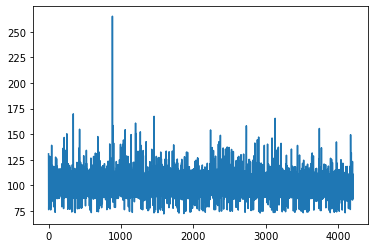

In [8]:
df.y.plot()

<AxesSubplot:xlabel='y', ylabel='Density'>

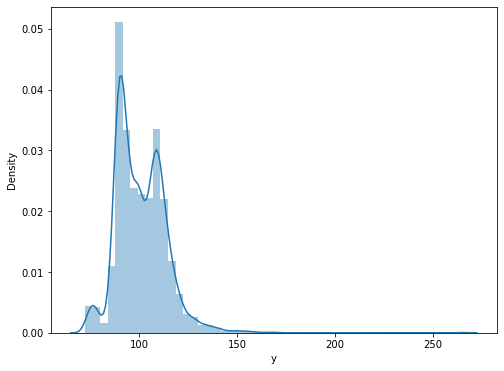

In [9]:
plt.figure(figsize=(8,6))
sns.distplot(df.y)

<AxesSubplot:xlabel='y'>

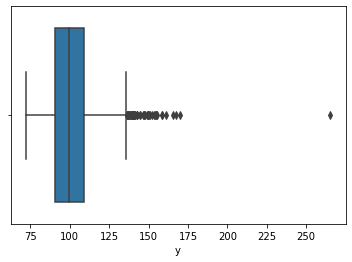

In [10]:
sns.boxplot(df.y)

Only One Point Greater than 200 seems to be outlier lets remove it

In [11]:
df.drop(df[df.y > 200].index, inplace = True)

### Now lets us have look at data types 

In [12]:
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ['count', 'column_type']
dtype_df.groupby('column_type').aggregate('count').reset_index()

,column_type,count
0,int64,369
1,float64,1
2,object,8


There is 369 integet columns, 8 categorical columns, and 1 float column

In [13]:
dtype_df.iloc[:11,:]

,count,column_type
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object
6,X4,object
7,X5,object
8,X6,object
9,X8,object


### Analysis of categorical columns

In [14]:
catagorical = df.select_dtypes(include=['object']).columns.to_list()
catagorical

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [15]:
integer = df.select_dtypes(include=['int']).columns.to_list()
len(integer)

369

In [16]:
df.head(2)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='X0', ylabel='y'>

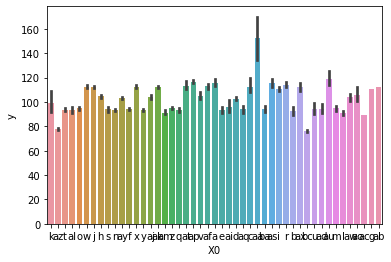

In [17]:
sns.barplot(df.X0, df.y.sort_values())

In [18]:
for col in catagorical:
    print(col)

X0
X1
X2
X3
X4
X5
X6
X8


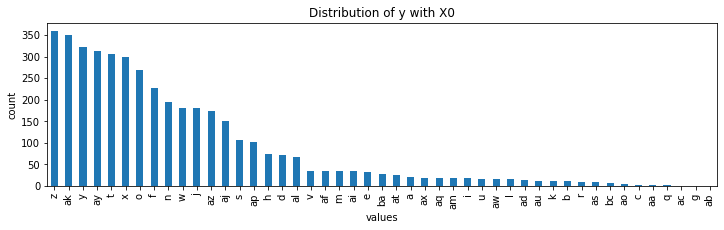

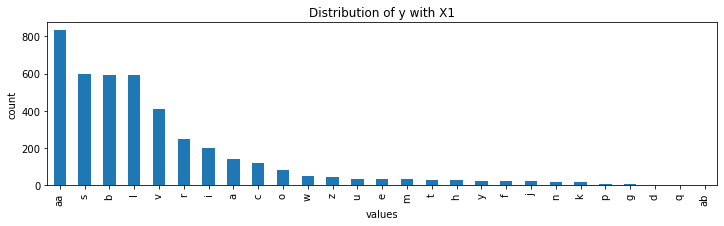

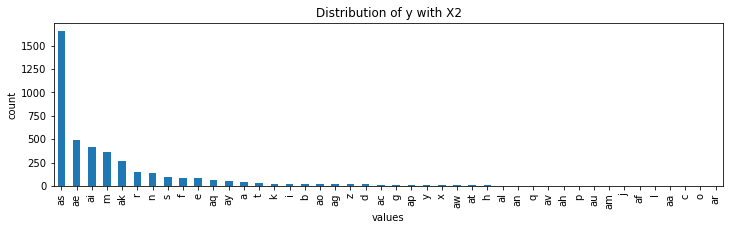

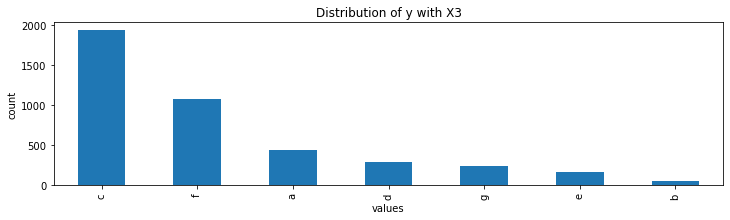

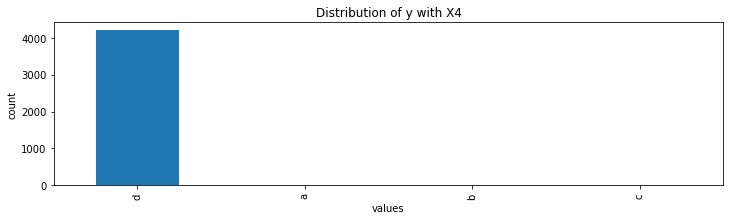

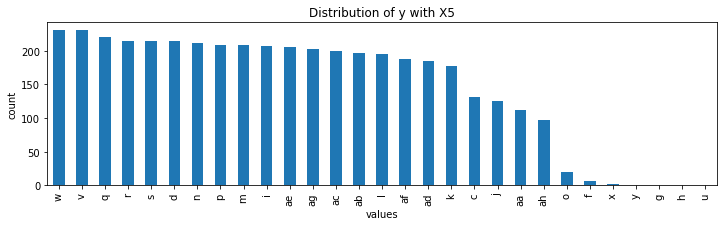

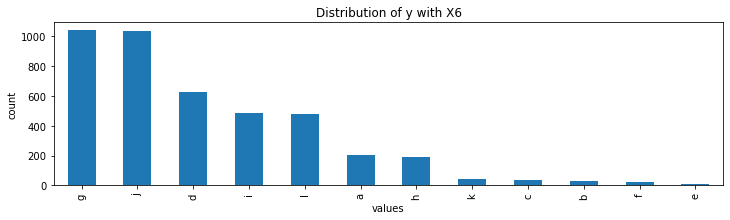

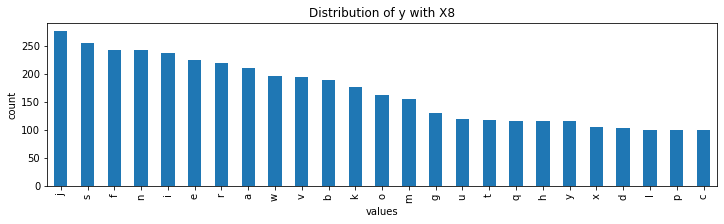

In [19]:
 for col in catagorical:
        #create new figure with one subplot
        curr_fig, curr_ax = plt.subplots(figsize=(12,3))
        #tell pandas to plot into the axes object of this new figure 
        df[col].value_counts().plot(kind='bar',
                                        figsize=(12,3),
                                        title="Distribution of y with {}".format(col),
                                        ylabel='count',
                                        xlabel='values',
                                        ax=curr_ax)

The categorical feature X4 has very low variance. So dropping this feature will have no impact on the performance.

In [20]:
df.X4.value_counts()

d    4204
a       2
b       1
c       1
Name: X4, dtype: int64

In [21]:
df.drop('X4', axis=1, inplace=True)

### Analysis of Binary Features:

In [22]:
df.select_dtypes(include=['int'])

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,8406,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8412,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,8415,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

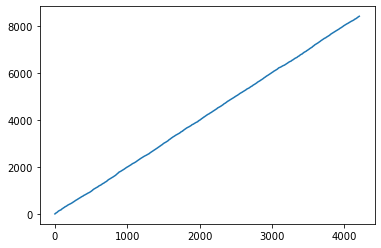

In [23]:
df.ID.plot()

Removing ID as its not required

In [24]:
df.drop('ID', axis=1, inplace=True)

<AxesSubplot:xlabel='X10', ylabel='count'>

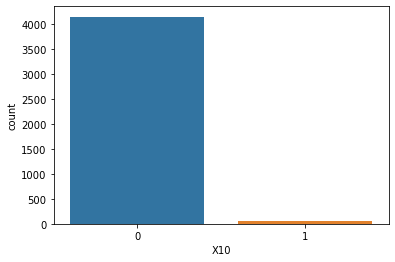

In [25]:
sns.countplot(df.X10)

<AxesSubplot:xlabel='X11', ylabel='count'>

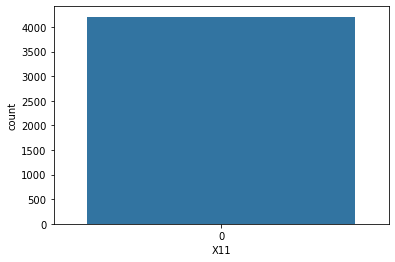

In [26]:
sns.countplot(df.X11)

<AxesSubplot:xlabel='X12', ylabel='count'>

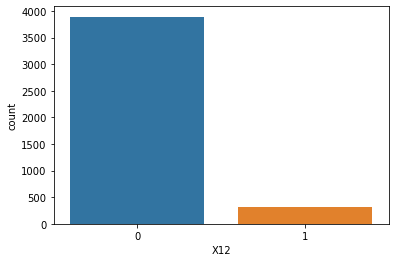

In [27]:
sns.countplot(df.X12)

<AxesSubplot:xlabel='X13', ylabel='count'>

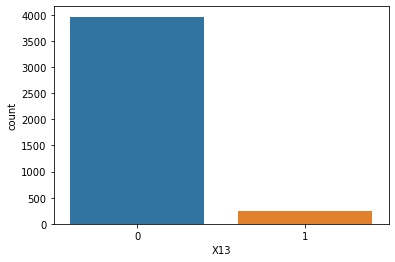

In [28]:
sns.countplot(df.X13)

 There seems more 0 in data than 1

### Data Preprocessing:

 LABEL ENCODING THE CATEGORICAL VARIABLE

In [29]:
df_test = pd.read_csv('test.csv')
df_test.shape
df_test.drop('X4', axis=1, inplace=True)

In [30]:
df_full = pd.concat([df,df_test], axis=0)

In [31]:
df_full.shape

(8417, 377)

In [32]:
catagorical.remove('X4')

In [33]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

for col in catagorical:
    df_full[col] = encode.fit_transform(df_full[col])

In [34]:
df_full.tail()

,y,X0,X1,X2,X3,X5,X6,X8,X10,X11,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,ID
4204,NaN,9,9,19,5,1,9,4,0,0,...,0,0,0,0,0,0,0,0,0,8410.0
4205,NaN,46,1,9,3,1,9,24,0,0,...,1,0,0,0,0,0,0,0,0,8411.0
4206,NaN,51,23,19,5,1,3,22,0,0,...,0,0,0,0,0,0,0,0,0,8413.0
4207,NaN,10,23,19,0,1,2,16,0,0,...,0,1,0,0,0,0,0,0,0,8414.0
4208,NaN,46,1,9,2,1,6,17,0,0,...,0,0,0,0,0,0,0,0,0,8416.0


In [35]:
df_full.shape

(8417, 377)

In [36]:
df_test = df_full[df_full.y.isnull()]

In [37]:
df_test.shape

(4209, 377)

In [38]:
df_train = df_full[~df_full.y.isnull()]

In [39]:
df_train.dropna(axis=1, inplace = True)

In [40]:
df_test.dropna(axis=1, inplace = True)
df_test.shape

(4209, 376)

In [41]:
X_ohe = df_train.drop('y', axis=1)
y = df_train.y

## Training model

In [42]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from xgboost import XGBRegressor, plot_importance
from statistics import mean

### XGBOOST - Base model with all features


In [43]:
xgb= XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)

fit_params = {"early_stopping_rounds": 5, "eval_set": [(X_ohe, y)]}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_scores = cross_validate(xgb, X_ohe, y, scoring=['neg_mean_absolute_error','r2'], cv=cv, n_jobs=-1, 
                            verbose=1, fit_params=fit_params, return_estimator=True)

print('mae:',abs(xgb_scores['test_neg_mean_absolute_error'].mean()))
print('r2:',xgb_scores['test_r2'].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.7s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.8s finished


mae: 5.400184543634216
r2: 0.5693837494274602


### Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=4, n_estimators=5, random_state=42)
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=42)
rf_scores = cross_validate(rf, X_ohe, y, scoring=['neg_mean_absolute_error','r2'], cv=cv, n_jobs=-1, return_estimator=True)

rf_base_mae = abs(rf_scores['test_neg_mean_absolute_error'].mean())
rf_base_r2 = rf_scores['test_r2'].mean()

print('mae:',rf_base_mae)
print('r2:',rf_base_r2)

mae: 5.296526701067371
r2: 0.5903033816186611


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.3, random_state = 42)


In [47]:
rfc = RandomForestRegressor(max_depth=4, n_estimators=5, random_state=42)
# evaluate model
forest_params = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
cv = KFold(n_splits=10, shuffle=True, random_state=42)

rf_scores = GridSearchCV(rfc ,forest_params, scoring='r2', cv=cv, n_jobs=-1)

rf_scores.fit(X_train, y_train)

# rf_base_mae = abs(rf_scores['test_neg_mean_absolute_error'].mean())
# rf_base_r2 = rf_scores['test_r2'].mean()

# print('mae:',rf_base_mae)
# print('r2:',rf_base_r2)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(max_depth=4, n_estimators=5,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             scoring='r2')

In [48]:
rf_scores.best_estimator_

RandomForestRegressor(max_depth=5, n_estimators=12, random_state=42)

In [49]:
rf_scores.best_score_

0.6092791356036134

In [50]:
import numpy as np

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'bootstrap': [True, False]}


In [52]:
rfr= RandomForestRegressor()
rfr_random = RandomizedSearchCV(estimator=rfr,
                                param_distributions=random_grid,
                                n_iter = 20,
                                scoring='r2',
                                cv = cv, 
                                verbose=2,
                                random_state=42,
                                n_jobs=-1, 
                                return_train_score=True)

rfr_random.fit(X_train, y_train)

print(rfr_random.best_params_)



Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'n_estimators': 5, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}


In [53]:
rfr_random.best_score_

0.6096300613638406

In [57]:
model = RandomForestRegressor(max_depth=5, n_estimators=12, random_state=42)

In [58]:
from sklearn import metrics

model.fit(X_train, y_train)

pred = model.predict(X_test)

metrics.r2_score(pred, y_test)

0.19966017538748926

In [68]:
df_test.shape

(4209, 375)

In [69]:
X_train.shape

(2945, 375)

In [70]:
df_test = df_test[X_train.columns]

In [71]:
df_test.shape

(4209, 375)

In [63]:
final = model.predict(df_test)

In [ ]:
submission = pd.read_csv('test.csv')

In [64]:
submission = submission.ID

NameError: name 'submission' is not defined

In [ ]:
final = pd.DataFrame(final)

In [ ]:
final = pd.concat([submission, final], axis=1)

In [ ]:
final.columns = ('ID', 'y')

In [ ]:
final.to_csv('submission.csv')

## Top Binary features using Random Forest

In [65]:
integer.remove('ID')

In [66]:
len(integer)

368

In [73]:
X = X_ohe.copy()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.3, random_state = 42)


In [75]:
binary_df = X[(integer)]

In [76]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(binary_df, y)

#Feature Importance

results= pd.DataFrame()
results['columns'] = binary_df.columns
results['importance'] = model.feature_importances_
results.sort_values(by='importance', ascending=False, inplace=True)
results= results[:15]

<AxesSubplot:xlabel='importance', ylabel='columns'>

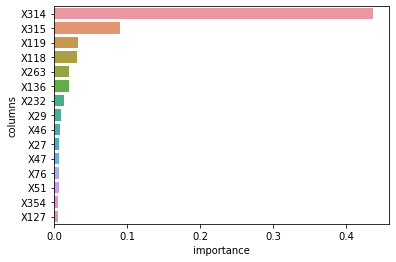

In [77]:
sns.barplot(x='importance', y='columns', data=results)

## Top Binary features using XGBOOST

<AxesSubplot:xlabel='importance', ylabel='columns'>

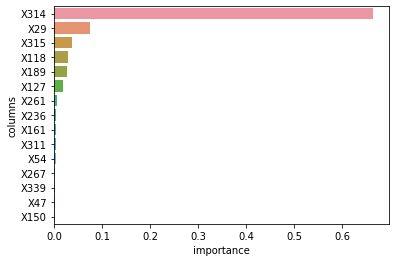

In [80]:
from xgboost import XGBRegressor
model1 = XGBRegressor()
model1.fit(binary_df, y)

#Feature Importance

results1= pd.DataFrame()
results1['columns'] = binary_df.columns
results1['importance'] = model1.feature_importances_
results1.sort_values(by='importance', ascending=False, inplace=True)
results1= results1[:15]

sns.barplot(x='importance', y='columns', data=results1)

### Lets select RandomForest selected features

In [81]:
rf_binary_df_top = binary_df[results['columns']]
rf_binary_df_top = rf_binary_df_top.join(X.drop((integer), axis=1))

In [82]:
print(X_ohe.shape)
print(rf_binary_df_top.shape)
print(y.shape)

(4208, 375)
(4208, 22)
(4208,)


In [83]:
xgb_binary_df_top = binary_df[results1['columns']]
xgb_binary_df_top = xgb_binary_df_top.join(X.drop((integer), axis=1))

In [ ]:
xgb= XGBRegressor(n_estimators=5, learning_rate=0.02, random_state=42)

fit_params = {"early_stopping_rounds": 5, "eval_set": [(rf_binary_df_top, y)]}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_scores = cross_validate(xgb, rf_binary_df_top, y, scoring=['neg_mean_absolute_error','r2'], cv=cv, n_jobs=-1, 
                            verbose=1, fit_params=fit_params, return_estimator=True)

print('mae:',abs(xgb_scores['test_neg_mean_absolute_error'].mean()))
print('r2:',xgb_scores['test_r2'].mean())

In [366]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=4, n_estimators=35, random_state=42)

# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=42)
rf_scores = cross_validate(rf, rf_binary_df_top, y,
                           scoring=['neg_mean_absolute_error','r2'], 
                           cv=cv, n_jobs=-1, 
                           return_estimator=True)

rf_base_mae = abs(rf_scores['test_neg_mean_absolute_error'].mean())
rf_base_r2 = rf_scores['test_r2'].mean()

print('mae:',rf_base_mae)
print('r2:',rf_base_r2)

mae: 5.271999111444085
r2: 0.5957537881601125


### HyperTunning RandomForest with RandomizedGearchCV

In [377]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 2000, num = 500)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [8, 10,12,14,15,16,18,20,22]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4, 5,6,7,8,9,10,11,12,13,14]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [378]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2,
                               random_state=42, n_jobs = -1,
                              scoring='r2')
# Fit the random search model
rf_random.fit(rf_binary_df_top, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 5, 6, 7, 8, 9,
                                                             10, 11, 12, 13,
                                                             14],
                                        'min_samples_split': [8, 10, 12, 14, 15,
                                                              16, 18, 20, 22],
                                        'n_estimators': [1, 5, 9, 13, 17, 21,
                                                         25, 29, 33, 37, 41, 45,
                                                         49, 53, 57, 

In [380]:
rf_random.best_score_

0.5822464466241466

In [381]:
rf_random.best_params_

{'n_estimators': 81,
 'min_samples_split': 16,
 'min_samples_leaf': 7,
 'max_features': 'auto',
 'max_depth': 3,
 'bootstrap': True}

### Hyperparameter tuning with GridSearchCV

In [99]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [int(x) for x in np.linspace(1, 10, num = 5)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [int(x) for x in np.linspace(4, 10, num = 5)],
    'min_samples_split': [int(x) for x in np.linspace(1, 15, num = 8)],
    'n_estimators': [int(x) for x in np.linspace(1, 100, num = 5)],
}

# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 1,
                          scoring='r2')

In [100]:
# Fit the grid search to the data
grid_search.fit(rf_binary_df_top, y)
grid_search.best_params_

Fitting 4 folds for each of 2000 candidates, totalling 8000 fits


{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 13,
 'n_estimators': 25}

In [101]:
grid_search.best_score_

0.5901815135192678

In [119]:
rf = RandomForestRegressor(bootstrap=True,
                             max_depth= 5,
                             max_features='auto',
                             min_samples_leaf= 5,
                            min_samples_split= 13,
                            n_estimators = 25)

In [120]:
df_test = df_test[X.columns]

In [121]:
X.shape

(4208, 375)

In [122]:
df_test.shape

(4209, 375)

In [123]:
rf

RandomForestRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=13,
                      n_estimators=25)

In [124]:
rf.fit(X,y)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=13,
                      n_estimators=25)

In [137]:
pred = rf.predict(df_test)

In [138]:
submission = pd.read_csv('test.csv')

In [139]:
submission = submission.ID

In [140]:
pred = pd.concat([submission, pd.DataFrame(pred)], axis=1)

In [143]:
pred.columns = ('ID', 'y')

In [144]:
pred.to_csv('submission_RF15.csv')

## PCA 

In [145]:
from sklearn.decomposition import PCA

In [146]:
X.shape

(4208, 375)

In [147]:
df_test.shape

(4209, 375)

In [283]:
pca = PCA(n_components= 80)

In [284]:
pca_df_train = pca.fit_transform(X[integer])
pca_df_test = pca.transform(df_test[integer])

In [285]:
pca1=pd.DataFrame(pca_df_train)

In [286]:
X.isnull().sum().sum()

0

In [287]:
train_pca = pd.concat([X[catagorical],pca1], axis=1)

test_pca = pd.concat([df_test[catagorical],pd.DataFrame(pca_df_test)], axis=1)

In [288]:
train_pca

,X0,X1,X2,X3,X5,X6,X8,0,1,2,...,70,71,72,73,74,75,76,77,78,79
0,37,23,20,0,27,9,14,0.748303,2.225544,1.069468,...,0.295662,0.344083,-0.501806,-0.230781,-0.818239,0.023862,0.025672,-0.038362,-0.733811,0.428233
1,37,21,22,4,31,11,14,-0.215018,1.123640,-0.804340,...,-0.082287,0.073708,0.071822,-0.031251,-0.158863,-0.402291,0.294736,-0.315835,-0.023042,-0.093719
2,24,24,38,2,30,9,23,-0.889926,2.968840,0.346040,...,-0.839913,-0.146996,0.149158,-0.159164,0.499692,0.326576,-0.235200,0.089912,-0.010811,0.550995
3,24,21,38,5,30,11,4,-0.509467,2.459552,-0.577491,...,-0.027307,0.325681,-0.172717,-0.284978,-0.044824,0.260994,-0.061643,-0.062056,-0.027888,0.158425
4,24,23,38,5,14,3,13,-0.487675,2.251643,-0.724819,...,0.085338,0.157232,-0.005912,-0.109070,0.056557,0.096590,-0.280828,-0.047896,0.056926,0.087448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,10,20,19,2,1,3,16,-2.219221,0.344467,1.417301,...,0.593169,0.199120,-0.321160,0.299612,0.456380,-0.216806,0.054818,0.234335,-0.243023,0.091368
4204,36,16,44,3,1,7,7,0.945460,0.266796,0.060592,...,-0.257071,-0.616947,-0.018593,-0.189936,-0.395934,-0.226252,0.024924,0.075539,-0.110013,0.099193
4205,10,23,42,0,1,6,4,-1.082320,1.073833,1.358807,...,-0.070127,0.060295,0.035967,0.039349,-0.051747,0.010203,-0.021506,0.077327,-0.013514,-0.017039
4206,11,19,29,5,1,11,20,0.449483,-0.624661,-2.964235,...,-0.046993,-0.281744,-0.022248,0.128552,0.021408,0.082407,0.014833,-0.521000,0.071975,-0.298743


In [224]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [int(x) for x in np.linspace(1, 10, num = 5)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [int(x) for x in np.linspace(4, 10, num = 5)],
    'min_samples_split': [int(x) for x in np.linspace(1, 15, num = 8)],
    'n_estimators': [int(x) for x in np.linspace(1, 100, num = 5)],
}

# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 1,
                          scoring='r2')

In [225]:
y.shape

(4208,)

In [226]:
# Fit the grid search to the data
grid_search.fit(train_pca, y)
grid_search.best_params_

Fitting 4 folds for each of 2000 candidates, totalling 8000 fits


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'n_estimators': 75}

In [227]:
grid_search.best_score_

0.5271490836098263

In [234]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=7,
                      n_estimators=75)

In [289]:
rf =RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=7,
                      n_estimators=75)
                           
# evaluate model

cv = KFold(n_splits=10, shuffle=True, random_state=42)
                           
rf_scores = cross_validate(rf, train_pca, y,
                           scoring=['neg_mean_absolute_error','r2'],
                           cv=5, n_jobs=-1, return_estimator=True)

rf_base_mae = abs(rf_scores['test_neg_mean_absolute_error'].mean())
rf_base_r2 = rf_scores['test_r2'].mean()

print('mae:',rf_base_mae)
print('r2:',rf_base_r2)

mae: 5.865945431191034
r2: 0.5234064174040343


GradientBoostingRegressor

In [294]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(loss='squared_error',
    learning_rate=0.005,
    n_estimators=50,
    subsample=1.0,
    criterion='r2',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=5,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)

In [297]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
                           
gb_scores = cross_validate(gb, train_pca, y,
                           scoring=['neg_mean_absolute_error','r2'],
                           cv=5, n_jobs=-1, return_estimator=True)

gb_base_mae = abs(gb_scores['test_neg_mean_absolute_error'].mean())
gb_base_r2 = gb_scores['test_r2'].mean()

print('mae:',gb_base_mae)
print('r2:',gb_base_r2)

mae: 5.865945431191034
r2: 0.5234064174040343


Decision Tree regressor

In [296]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

cv = KFold(n_splits=10, shuffle=True, random_state=42)
                           
dt_scores = cross_validate(dt, train_pca, y,
                           scoring=['neg_mean_absolute_error','r2'],
                           cv=5, n_jobs=-1, return_estimator=True)

dt_base_mae = abs(dt_scores['test_neg_mean_absolute_error'].mean())
dt_base_r2 = dt_scores['test_r2'].mean()

print('mae:',dt_base_mae)
print('r2:',dt_base_r2)

mae: 8.211291439924508
r2: 0.04381989459768878


## Conclusion:

#### We tried different techinique seems like the RandomForest selected 15 features is better than other it gave me Private score of 0.54815 and Public score of 0.55468
#### PCA Didnt gave results as expected 
#### We tried different approach to select best paramaters by using Hyperparameter optimizations like GridSearchcv and RandomSearchCV